ایمپورت کردن کتابحانه ها

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


خواندن داده‌ها


In [5]:


data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print("train & val size:", len(data))
print("test size:", len(test_data))







train & val size: 150
test size: 50


# جدا کردن داده‌های اعتبارسنجی


In [6]:
from sklearn.model_selection import train_test_split
train_data, validation_data = train_test_split(data, test_size=50, random_state=42)


نمایش نمونه‌ای از داده‌های آموزشی


In [7]:
train_data.head()



,x1,x2,labels
96,1.364530,2.418171,0.0
105,-0.539465,-0.665129,1.0
66,-1.237597,0.739877,0.0
0,-1.872262,-0.999991,1.0
122,-0.412532,0.259302,1.0


In [8]:
print("train size:", len(train_data))
print("val size:", len(validation_data))


train size: 100
val size: 50


نمایش نمونه‌ای از داده‌های اعتبارسنجی


In [9]:
validation_data.head()

,x1,x2,labels
73,2.633861,2.183641,0.0
18,-3.078126,1.424294,0.0
118,0.983731,2.048528,0.0
78,-1.554930,-0.878871,1.0
76,-2.316528,-0.989079,1.0


In [184]:
X_train = train_data.to_numpy()[:, :2]
X_test = test_data.to_numpy()
y_train = train_data.to_numpy()[:, 2]

X_val = validation_data.to_numpy()[:, :2]
y_val = validation_data.to_numpy()[:, 2]


# نرمال سسازی داده‌ها


In [185]:
X_train_mean = np.mean(X_train, axis=0, keepdims=True)
X_train_std = np.std(X_train, axis=0, keepdims=True)

In [186]:
X_test.shape

(50, 2)

In [187]:
Z_train = (X_train - X_train_mean) / X_train_std
Z_val = (X_val - X_train_mean) / X_train_std
Z_test = (X_test - X_train_mean) / X_train_std


# رسم نمودار داده‌ها

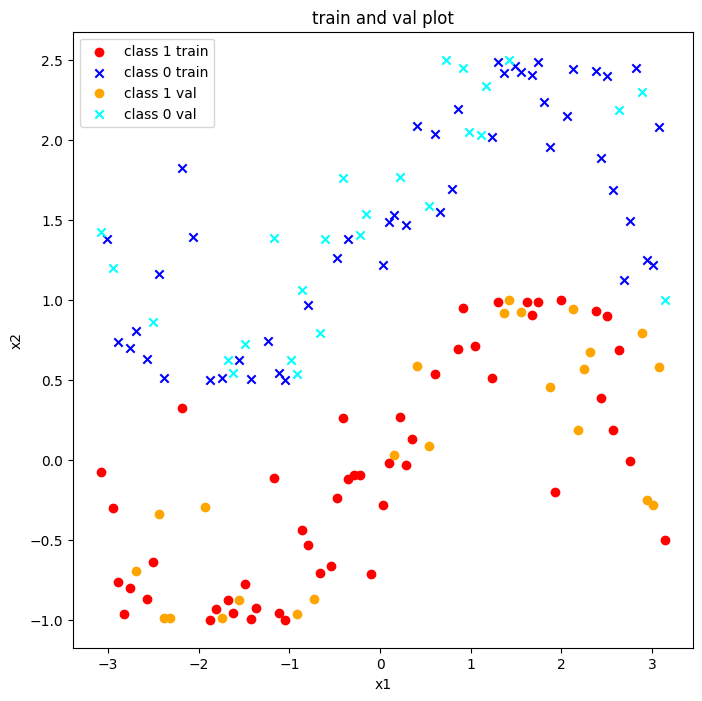

In [13]:

# جدا کردن داده‌ها بر اساس کلاس‌ها
class1_train = X_train[train_data['labels'] == 1]
class2_train = X_train[train_data['labels'] == 0]

class1_val = X_val[validation_data['labels'] == 1]
class2_val = X_val[validation_data['labels'] == 0]

plt.figure(figsize=(8,8))
# رسم نمودار
plt.scatter(class1_train[:, 0], class1_train[:, 1], marker='o', color='red', label='class 1 train')
plt.scatter(class2_train[:, 0], class2_train[:, 1], marker='x', color='blue', label='class 0 train')

# افزودن نمودارهای اعتبارسنجی
plt.scatter(class1_val[:, 0], class1_val[:, 1], marker='o', color='orange', label='class 1 val')
plt.scatter(class2_val[:, 0], class2_val[:, 1], marker='x', color='cyan', label='class 0 val')


# افزودن عنوان و برچسب‌ها
plt.title("train and val plot")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()



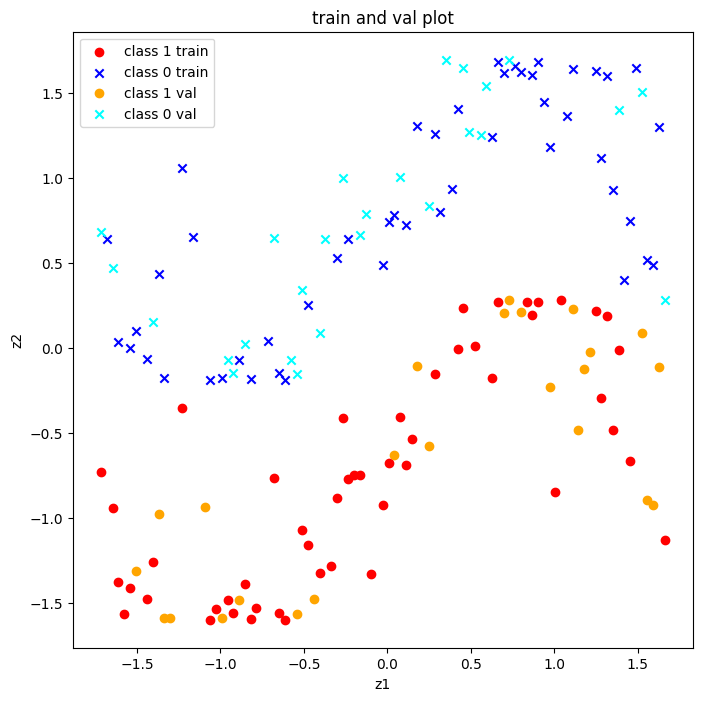

In [14]:

# جدا کردن داده‌ها بر اساس کلاس‌ها
class1_train = Z_train[train_data['labels'] == 1]
class2_train = Z_train[train_data['labels'] == 0]

class1_val = Z_val[validation_data['labels'] == 1]
class2_val = Z_val[validation_data['labels'] == 0]

plt.figure(figsize=(8,8))
# رسم نمودار
plt.scatter(class1_train[:, 0], class1_train[:, 1], marker='o', color='red', label='class 1 train')
plt.scatter(class2_train[:, 0], class2_train[:, 1], marker='x', color='blue', label='class 0 train')

# افزودن نمودارهای اعتبارسنجی
plt.scatter(class1_val[:, 0], class1_val[:, 1], marker='o', color='orange', label='class 1 val')
plt.scatter(class2_val[:, 0], class2_val[:, 1], marker='x', color='cyan', label='class 0 val')


# افزودن عنوان و برچسب‌ها
plt.title("train and val plot")
plt.xlabel('z1')
plt.ylabel('z2')
plt.legend()



الگوریتم پرسپترون

In [130]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, max_epochs=500, add_bias=True):
        if add_bias:
            self.weights = np.random.rand(input_size + 1)  # +1 for the bias
        else:
            self.weights = np.random.rand(input_size)  # +1 for the bias

        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs

    def activation_function(self, x):
        # Step function as the activation function
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        if self.add_bias:
            # Add bias term to the inputs
            inputs_with_bias = np.insert(inputs, 0, 1)
        else:
            inputs_with_bias = inputs.copy()
        # Calculate the dot product of weights and inputs
        result = np.dot(self.weights, inputs_with_bias)
        # Apply the activation function
        return self.activation_function(result)

    def fit(self, training_data, labels):
        for epoch in range(self.max_epochs):
            for inputs, label in zip(training_data, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                # Update weights based on the error and input values
                if self.add_bias:
                    self.weights += self.learning_rate * error * np.insert(inputs, 0, 1)
                else:
                    self.weights += self.learning_rate * error * inputs

    def evaluate(self, test_data, labels):
        correct_predictions = 0
        predictions = []
        for inputs, label in zip(test_data, labels):
            prediction = self.predict(inputs)
            predictions.append(prediction)
            if prediction == label:
                correct_predictions += 1
        accuracy = correct_predictions / len(labels)
        return predictions, accuracy
    
    def plot_decision_boundary(self, train_data, train_labels, val_data, val_labels, train_nonPoly=None, val_nonPoly=None, names=None, degree=None):
        
        if train_nonPoly is None:
            train_nonPoly = train_data.copy()
        if val_nonPoly is None:
            val_nonPoly = val_data.copy()
        
        plt.figure(dpi=200)
        # Plot training data
        plt.scatter(train_nonPoly[train_labels == 0][:, 0], train_nonPoly[train_labels == 0][:, 1], c='blue', marker='x', label='Class 0 (Train)')
        plt.scatter(train_nonPoly[train_labels == 1][:, 0], train_nonPoly[train_labels == 1][:, 1], c='red', marker='o', label='Class 1 (Train)')

        # Plot validation data
        plt.scatter(val_nonPoly[val_labels == 0][:, 0], val_nonPoly[val_labels == 0][:, 1], c='cyan', marker='x', label='Class 0 (Validation)')
        plt.scatter(val_nonPoly[val_labels == 1][:, 0], val_nonPoly[val_labels == 1][:, 1], c='orange', marker='o', label='Class 1 (Validation)')

        # Plot decision boundary
        x_min, x_max = np.min(train_nonPoly[:, 0]) - 0.1, np.max(train_nonPoly[:, 0]) + 0.1
        y_min, y_max = np.min(train_nonPoly[:, 1]) - 0.1, np.max(train_nonPoly[:, 1]) + 0.1

        # Plot decision boundary
        x_min, x_max = np.min(train_nonPoly[:, 0]) - 0.1, np.max(train_nonPoly[:, 0]) + 0.1
        y_min, y_max = np.min(train_nonPoly[:, 1]) - 0.1, np.max(train_nonPoly[:, 1]) + 0.1

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
        grid_data = np.c_[xx.ravel(), yy.ravel()]
        if (val_nonPoly is not None) and (train_nonPoly is not None) and (names is not None) and (degree is not None):
            poly = extract_polynomial_features(degree, names, grid_data.T)
            grid_data = poly()
            
        predictions = np.array([self.predict(point) for point in grid_data])

        plt.contourf(xx, yy, predictions.reshape(xx.shape), cmap=plt.cm.Paired, alpha=0.3)

        # Mark misclassified points with a larger size
        all_data = np.vstack((train_data, val_data))
        all_labels = np.concatenate((train_labels, val_labels))
        predictions_all = np.array([self.predict(point) for point in all_data])

        misclassified_indices = np.where(predictions_all != all_labels)[0]
        if (val_nonPoly is not None) and (train_nonPoly is not None) and (names is not None) and (degree is not None):
            x1_index = 1
            x2_index = 2
        else:
            x1_index = 0
            x2_index = 1
        plt.scatter(all_data[misclassified_indices, x1_index], all_data[misclassified_indices, x2_index], s=80, edgecolors='black', facecolors='none', linewidths=2, label='Misclassified')

        if degree is None:
            plt.title("Perceptron Decision Boundary")
        else:
            plt.title("Perceptron Decision Boundary Degree {}".format(degree))
        plt.xlabel('z1')
        plt.ylabel('z2')
        plt.legend()
        plt.show()

# # Example usage:

# # Generate some random training data
# np.random.seed(42)
# training_data = np.random.rand(100, 2)
# labels = (training_data[:, 0] + training_data[:, 1] > 1).astype(int)

# # Create a Perceptron instance with 2 input features
# perceptron = Perceptron(input_size=2)

# # Train the Perceptron
# perceptron.fit(training_data, labels)

# # Test the Perceptron on new data
# test_data = np.random.rand(20, 2)
# test_labels = (test_data[:, 0] + test_data[:, 1] > 1).astype(int)

# _, accuracy = perceptron.evaluate(test_data, test_labels)
# print(f"Accuracy: {accuracy * 100:.2f}%")

# perceptron.plot_decision_boundary(training_data, labels, test_data, test_labels)


In [131]:
train_data.shape

(100, 3)

In [132]:
#from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix

# ایجاد یک مدل پرسپترون
perceptron_model = Perceptron(input_size=2)

# آموزش مدل روی داده‌های آموزش
perceptron_model.fit(Z_train, y_train)

# پیش‌بینی برچسب‌ها بر روی داده‌های آموزش
train_predictions, accuracy = perceptron_model.evaluate(Z_train, y_train)
train_accuracy = accuracy_score(y_train, train_predictions)
assert accuracy == train_accuracy

# پیش‌بینی برچسب‌ها بر روی داده‌های اعتبارسنجی
validation_predictions, accuracy = perceptron_model.evaluate(Z_val, y_val)
validation_accuracy = accuracy_score(y_val, validation_predictions)
assert accuracy == validation_accuracy

# گزارش دقت
print(f'train accuracy: {train_accuracy * 100:.2f}%')
print(f'validation: {validation_accuracy * 100:.2f}%')

confusion_matrix_val = confusion_matrix(y_val, validation_predictions)
print(confusion_matrix_val)

confusion_matrix_train = confusion_matrix(y_train, train_predictions)
print(confusion_matrix_train)

train accuracy: 95.00%
validation: 96.00%
[[24  2]
 [ 0 24]]
[[45  4]
 [ 1 50]]


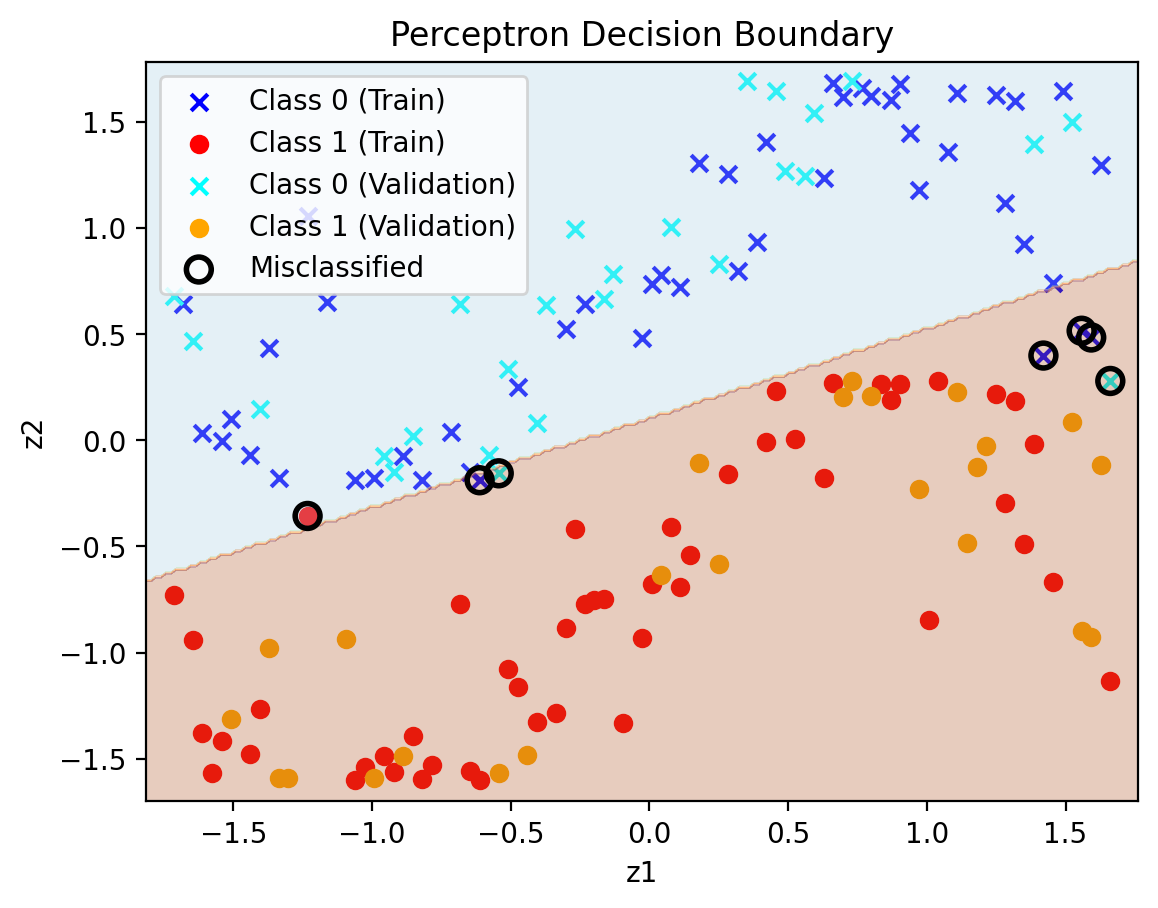

In [133]:
perceptron_model.plot_decision_boundary(Z_train, y_train, Z_val, y_val)


Adding Polynomial Features

In [134]:
class extract_polynomial_features:
    def __init__(self, degree, variable_names, vaiable_values):
        self.degree = degree
        self.names, self.variables = variable_names, vaiable_values
        self.features_names = []
        self.features_array = []
    
    def extract_feature(self, degree, current_feature_tuple, current_variable_index):
        current_feature_name = current_feature_tuple[0]
        current_feature_val = current_feature_tuple[1]
        
        if degree == 0:
            if len(current_feature_name) == 0:
                self.features_names.append(current_feature_name + '1')
            else:
                self.features_names.append(current_feature_name)
            self.features_array.append(current_feature_val)
        else:    
            for i, (name, variable) in enumerate(zip(self.names[current_variable_index:], self.variables[current_variable_index:])):
                self.extract_feature(degree - 1, (current_feature_name + name, current_feature_val * variable), current_variable_index+i)
            
    def __call__(self):
        for degree in range(self.degree + 1):
            self.extract_feature(degree, ('', np.ones_like(self.variables[0])), 0)
        return np.array(self.features_array).T
        

In [135]:
Z_poly_train = {}
Z_poly_val = {}
input_sizes = {}
for degree in [2, 3, 5, 10]:
    names = ['z1', 'z2']
    poly = extract_polynomial_features(degree, names, Z_train.T)
    Z_poly_train[degree] = poly()
    poly = extract_polynomial_features(degree, names, Z_val.T)
    Z_poly_val[degree] = poly()
    
    input_sizes[degree] = Z_poly_train[degree].shape[1]
    # print('name','value', sep='\t')
    # for n, v in zip(poly.features_names, poly.features_array):
    #     print(n, v, sep='\t')


In [136]:
print(poly.features_names)
for degree in [2, 3, 5, 10]:
    print(Z_poly_train[degree].shape)
    print(Z_poly_val[degree].shape)


['1', 'z1', 'z2', 'z1z1', 'z1z2', 'z2z2', 'z1z1z1', 'z1z1z2', 'z1z2z2', 'z2z2z2', 'z1z1z1z1', 'z1z1z1z2', 'z1z1z2z2', 'z1z2z2z2', 'z2z2z2z2', 'z1z1z1z1z1', 'z1z1z1z1z2', 'z1z1z1z2z2', 'z1z1z2z2z2', 'z1z2z2z2z2', 'z2z2z2z2z2', 'z1z1z1z1z1z1', 'z1z1z1z1z1z2', 'z1z1z1z1z2z2', 'z1z1z1z2z2z2', 'z1z1z2z2z2z2', 'z1z2z2z2z2z2', 'z2z2z2z2z2z2', 'z1z1z1z1z1z1z1', 'z1z1z1z1z1z1z2', 'z1z1z1z1z1z2z2', 'z1z1z1z1z2z2z2', 'z1z1z1z2z2z2z2', 'z1z1z2z2z2z2z2', 'z1z2z2z2z2z2z2', 'z2z2z2z2z2z2z2', 'z1z1z1z1z1z1z1z1', 'z1z1z1z1z1z1z1z2', 'z1z1z1z1z1z1z2z2', 'z1z1z1z1z1z2z2z2', 'z1z1z1z1z2z2z2z2', 'z1z1z1z2z2z2z2z2', 'z1z1z2z2z2z2z2z2', 'z1z2z2z2z2z2z2z2', 'z2z2z2z2z2z2z2z2', 'z1z1z1z1z1z1z1z1z1', 'z1z1z1z1z1z1z1z1z2', 'z1z1z1z1z1z1z1z2z2', 'z1z1z1z1z1z1z2z2z2', 'z1z1z1z1z1z2z2z2z2', 'z1z1z1z1z2z2z2z2z2', 'z1z1z1z2z2z2z2z2z2', 'z1z1z2z2z2z2z2z2z2', 'z1z2z2z2z2z2z2z2z2', 'z2z2z2z2z2z2z2z2z2', 'z1z1z1z1z1z1z1z1z1z1', 'z1z1z1z1z1z1z1z1z1z2', 'z1z1z1z1z1z1z1z1z2z2', 'z1z1z1z1z1z1z1z2z2z2', 'z1z1z1z1z1z1z2z2z2z2'

In [137]:
input_sizes

{2: 6, 3: 10, 5: 21, 10: 66}

train accuracy: 97.00%
validation: 96.00%
[[24  2]
 [ 0 24]]
[[47  2]
 [ 1 50]]


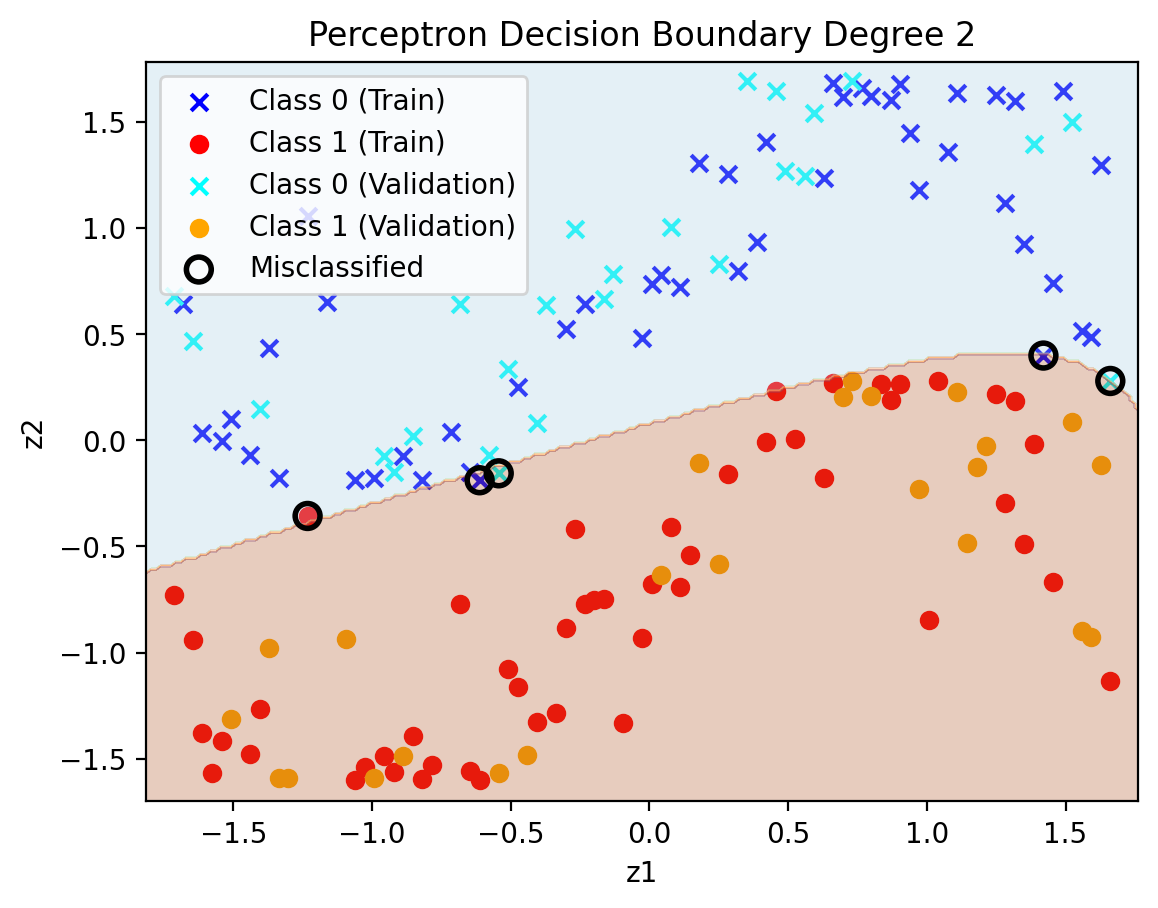

train accuracy: 100.00%
validation: 100.00%
[[26  0]
 [ 0 24]]
[[49  0]
 [ 0 51]]


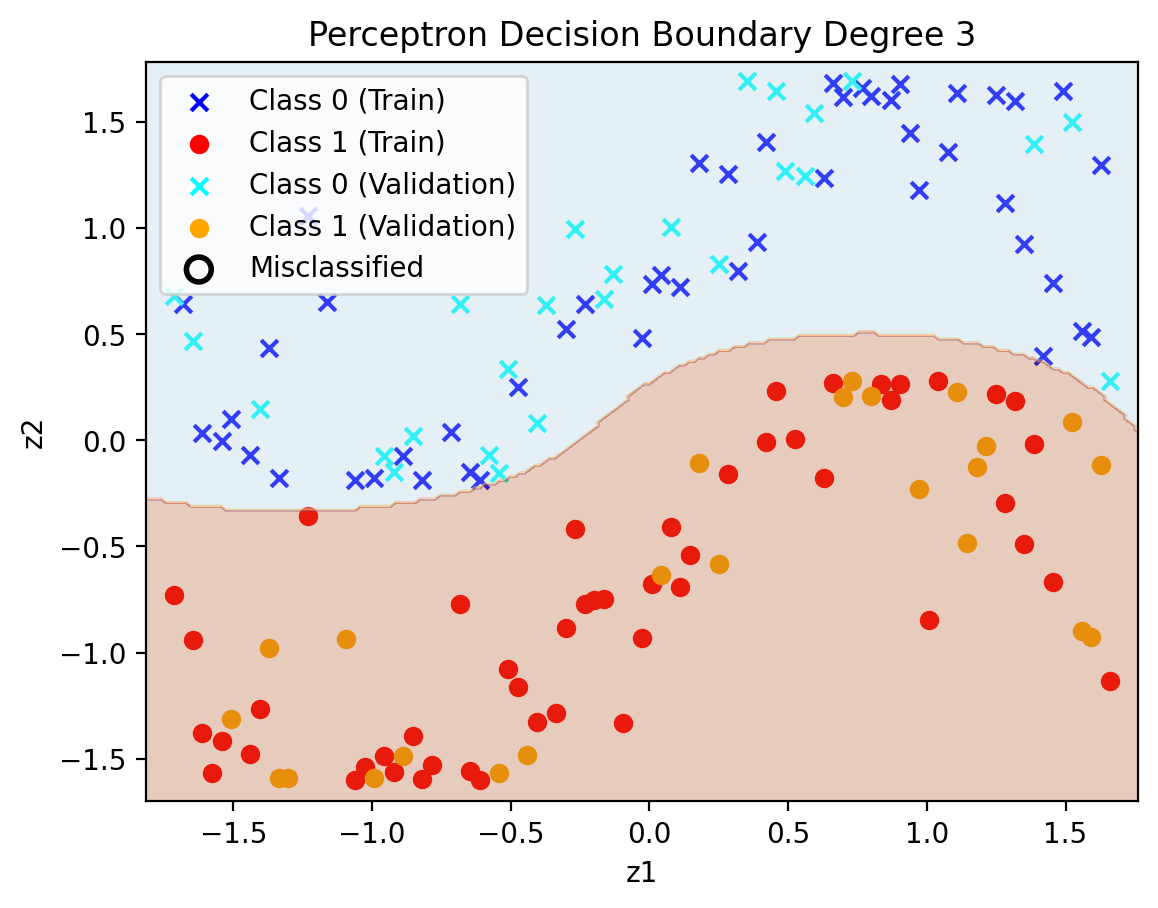

train accuracy: 100.00%
validation: 96.00%
[[26  0]
 [ 2 22]]
[[49  0]
 [ 0 51]]


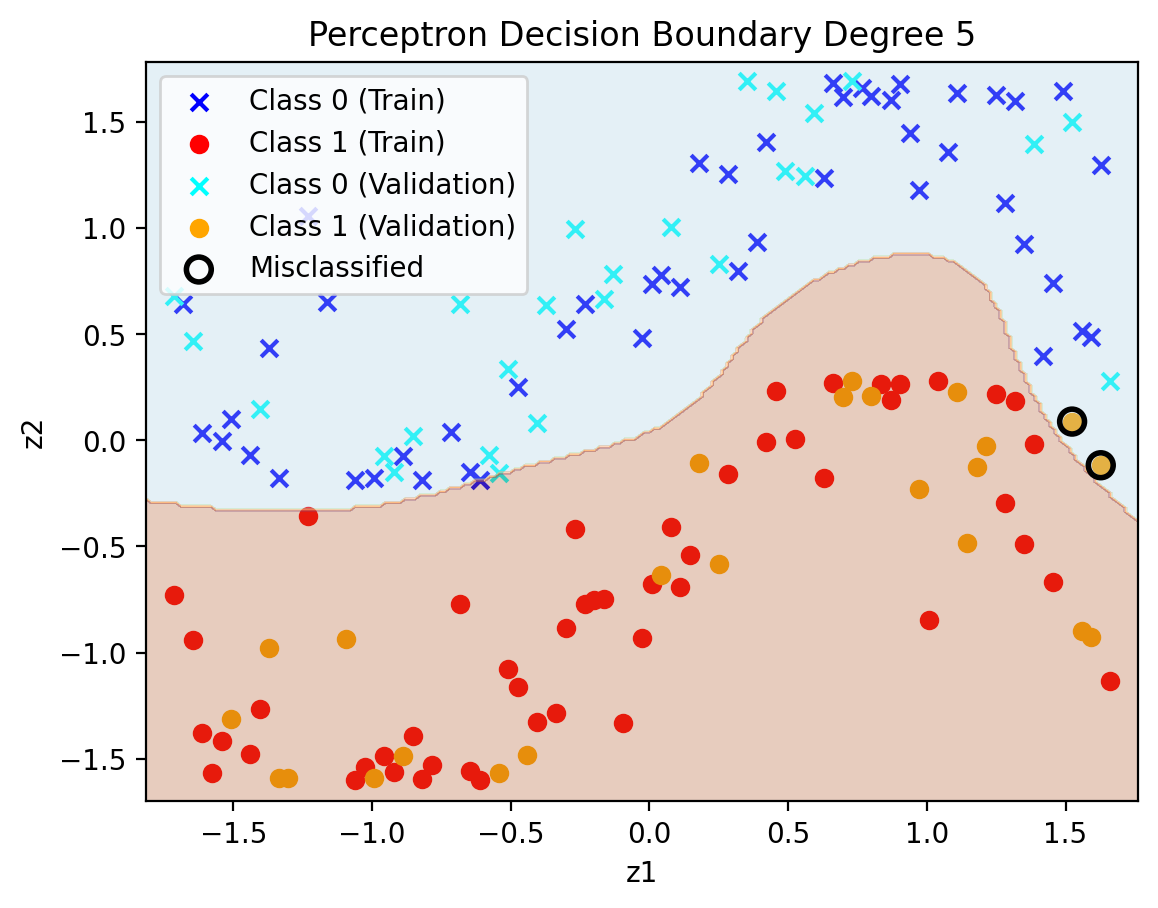

train accuracy: 100.00%
validation: 100.00%
[[26  0]
 [ 0 24]]
[[49  0]
 [ 0 51]]


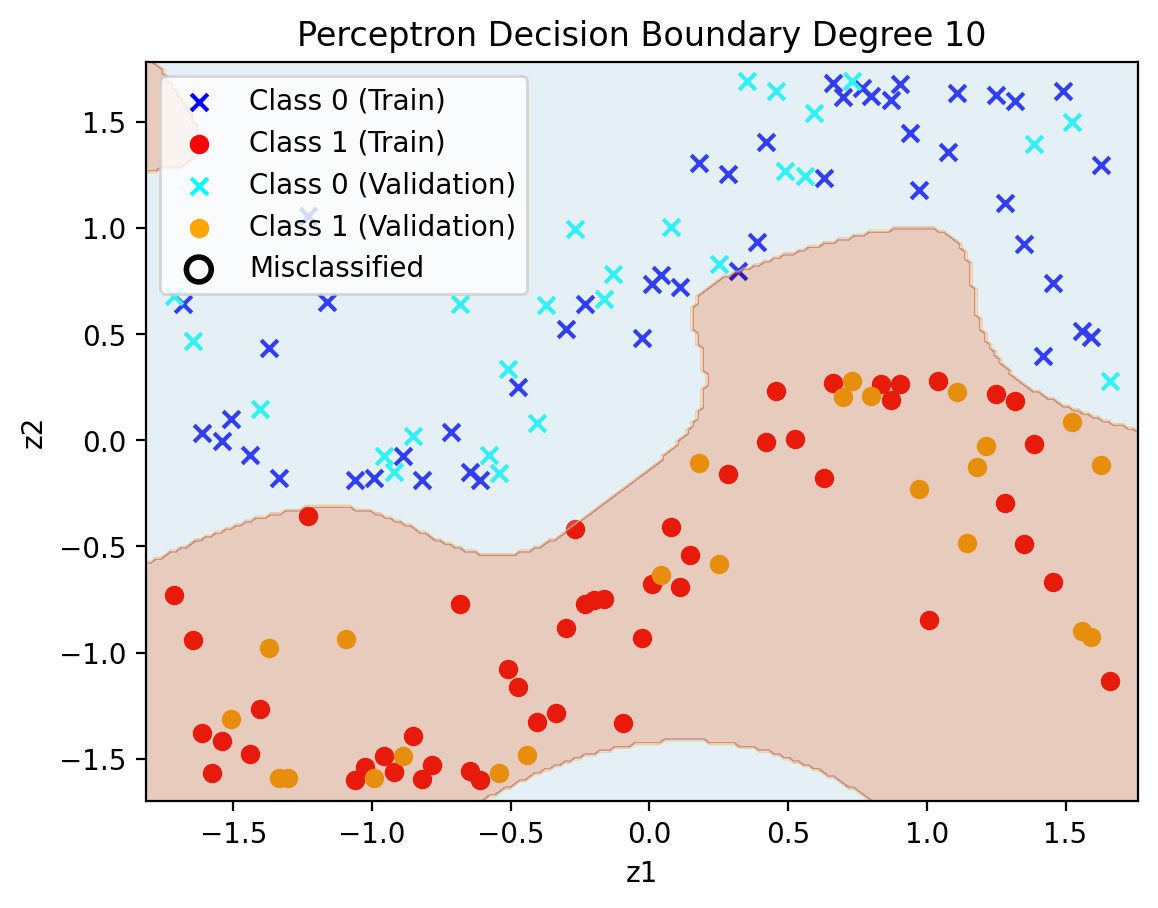

In [141]:
models = {}
for degree in [2, 3, 5, 10]:

    # ایجاد یک مدل پرسپترون
    perceptron_model = Perceptron(input_size=input_sizes[degree], add_bias=False)
    
    # آموزش مدل روی داده‌های آموزش
    perceptron_model.fit(Z_poly_train[degree], y_train)

    # پیش‌بینی برچسب‌ها بر روی داده‌های آموزش
    train_predictions, accuracy = perceptron_model.evaluate(Z_poly_train[degree], y_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    assert accuracy == train_accuracy

    # پیش‌بینی برچسب‌ها بر روی داده‌های اعتبارسنجی

    validation_predictions, accuracy = perceptron_model.evaluate(Z_poly_val[degree], y_val)
    validation_accuracy = accuracy_score(y_val, validation_predictions)
    assert accuracy == validation_accuracy

    # گزارش دقت
    print(f'train accuracy: {train_accuracy * 100:.2f}%')
    print(f'validation: {validation_accuracy * 100:.2f}%')

    confusion_matrix_val = confusion_matrix(y_val, validation_predictions)
    print(confusion_matrix_val)

    confusion_matrix_train = confusion_matrix(y_train, train_predictions)
    print(confusion_matrix_train)
    
    perceptron_model.plot_decision_boundary(Z_poly_train[degree], y_train, Z_poly_val[degree], y_val, Z_train, Z_val, names, degree)
    
    models[degree] = perceptron_model



Predicting test data


In [140]:
test_data.head()

,x1,x2
0,1.491463,0.961469
1,0.475999,0.982520
2,-1.301064,0.899631
3,1.618396,2.482466
4,-0.285599,1.402946


In [189]:
Z_poly_test = {}
for degree in [2, 3, 5, 10]:
    poly = extract_polynomial_features(degree, names, Z_test.T)
    Z_poly_test[degree] = poly()



In [190]:
best_degree = 3
best_model = models[best_degree]

In [191]:
Z_poly_test[best_degree].shape

(50, 10)

In [192]:
test_predictions, accuracy = best_model.evaluate(Z_poly_test[best_degree], np.ones(Z_poly_test[best_degree].shape[0],))


In [193]:
for p in test_predictions:
    print(p, end=' ')

1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 

In [194]:
with open("preds.csv", 'w') as f:
    f.write('labels\n')
    for p in test_predictions:
        f.write(str(p) + '\n')

In [195]:
len(test_predictions)

50

In [199]:
X1_test = Z_test[:, 0]
X2_test = Z_test[:, 1]

In [200]:
test_predictions = np.array(test_predictions)
test_predictions.shape


(50,)

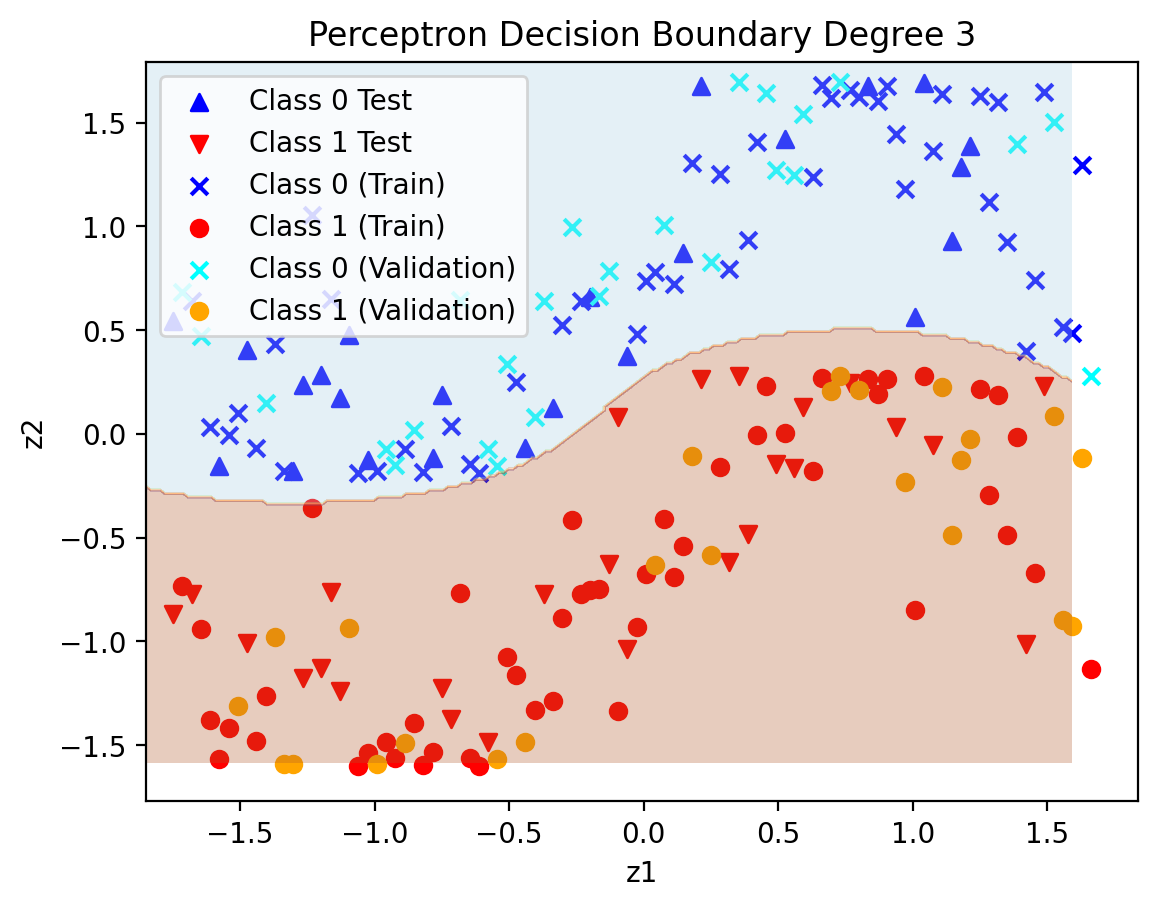

In [204]:
plt.figure(dpi=200)
# Plot training data
plt.scatter(X1_test[test_predictions == 0], X2_test[test_predictions == 0], c='blue', marker='^', label='Class 0 Test')
plt.scatter(X1_test[test_predictions == 1], X2_test[test_predictions == 1], c='red', marker='v', label='Class 1 Test')

train_nonPoly = Z_train
train_labels = y_train

val_nonPoly = Z_val
val_labels = y_val
plt.scatter(train_nonPoly[train_labels == 0][:, 0], train_nonPoly[train_labels == 0][:, 1], c='blue', marker='x', label='Class 0 (Train)')
plt.scatter(train_nonPoly[train_labels == 1][:, 0], train_nonPoly[train_labels == 1][:, 1], c='red', marker='o', label='Class 1 (Train)')

# Plot validation data
plt.scatter(val_nonPoly[val_labels == 0][:, 0], val_nonPoly[val_labels == 0][:, 1], c='cyan', marker='x', label='Class 0 (Validation)')
plt.scatter(val_nonPoly[val_labels == 1][:, 0], val_nonPoly[val_labels == 1][:, 1], c='orange', marker='o', label='Class 1 (Validation)')

        # Plot decision boundary
# Plot decision boundary
x_min, x_max = np.min(X1_test) - 0.1, np.max(X1_test) + 0.1
y_min, y_max = np.min(X2_test) - 0.1, np.max(X2_test) + 0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
grid_data = np.c_[xx.ravel(), yy.ravel()]
poly = extract_polynomial_features(best_degree, names, grid_data.T)
grid_data = poly()
    
predictions = np.array([best_model.predict(point) for point in grid_data])
plt.contourf(xx, yy, predictions.reshape(xx.shape), cmap=plt.cm.Paired, alpha=0.3)


plt.title("Perceptron Decision Boundary Degree {}".format(best_degree))
plt.xlabel('z1')
plt.ylabel('z2')
plt.legend()